Zen  ---  74
Garden  ---  74
Linear  ---  95
Accelerator  ---  93
Control  ---  89
Room  ---  89
Work  ---  93
Area  ---  95
CT  ---  60
Control  ---  60
Room  ---  94
Exam  ---  93
Room  ---  93
Treatment  ---  96
Planning  ---  95
Patient  ---  94
Holding  ---  96
Sub-Waiting  ---  91
10  ---  87
Electrical  ---  87
Room  ---  90
11  ---  95
Staff  ---  90
Lounge  ---  90
12Waiting  ---  84
Area  ---  92
13  ---  95
Lobby  ---  88
14  ---  63
Conference  ---  63
15  ---  93
Office  ---  91
16  ---  76
Reception  ---  76
1  ---  93
Ez  ---  48
15  ---  93
10  ---  94
n  ---  47
ih  ---  42
ail  ---  46
~~  ---  57
AG  ---  76
12  ---  93
16  ---  96
Ms  ---  33
13  ---  83
&  ---  38
Yj  ---  77
4  ---  80
y  ---  52
Main  ---  80
Entry  ---  96
Patient  ---  93
Drop-Off  ---  96


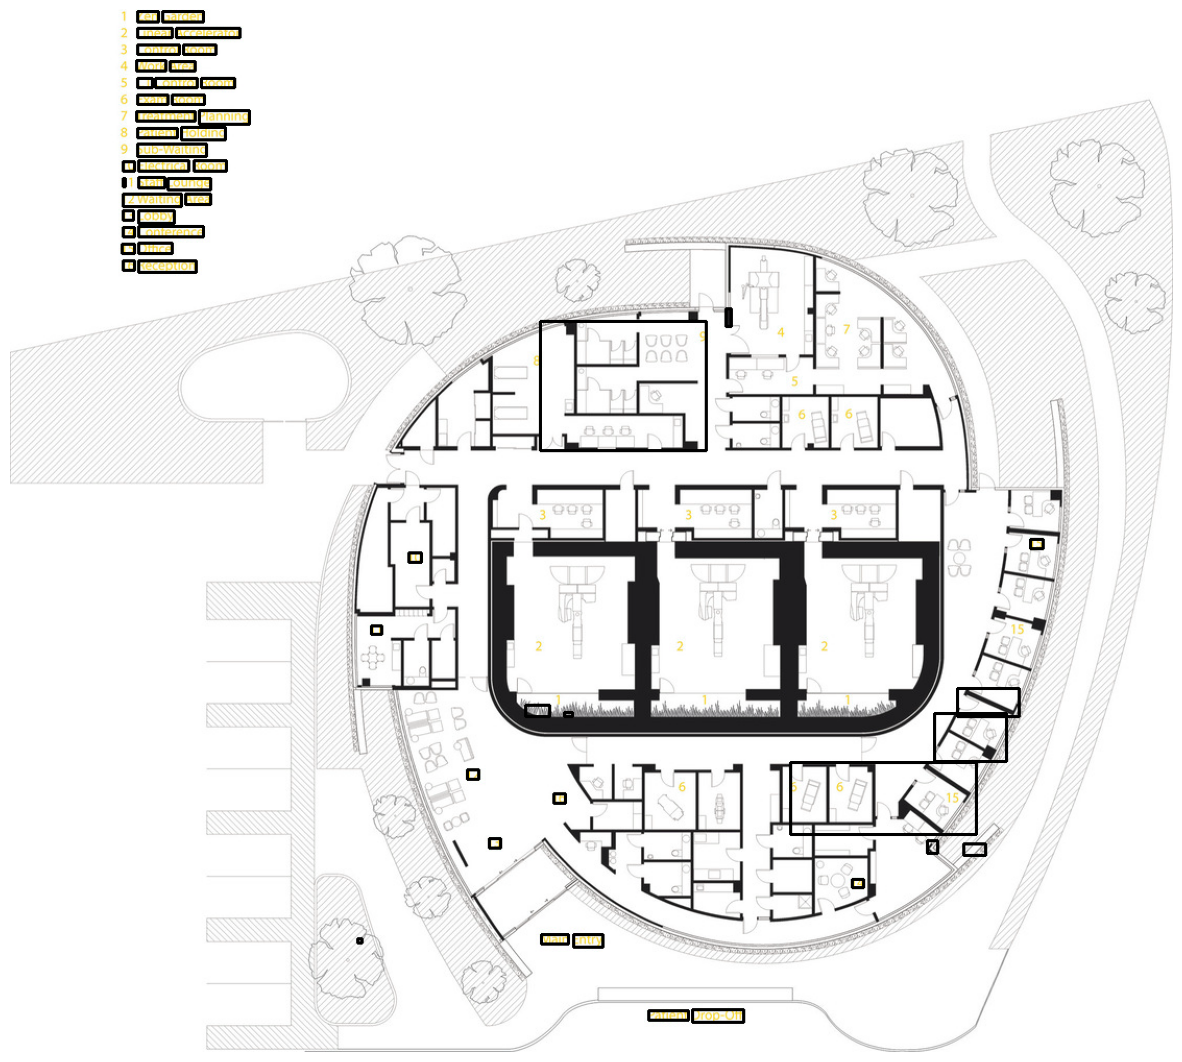

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("../assets/images/hospital_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess the image (optional, improves OCR accuracy)
# gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Perform OCR with enhanced parameters
custom_config = r"--psm 11 --oem 3"
d = pytesseract.image_to_data(image, lang="eng", config=custom_config, output_type=pytesseract.Output.DICT)


# Loop through detected text bounding boxes
for i in range(len(d['text'])):
    if int(d['conf'][i]) > 30:  # Only consider text with confidence > 60
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        print(d['text'][i], ' --- ' ,d['conf'][i])
        
        # Create a mask for inpainting
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 2)

# Use inpainting to restore the erased regions
mask = cv2.inRange(image, (0, 0, 0), (0, 0, 0))
inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)


# Display the result
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis('off')
plt.show()
